In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install scipy

In [2]:
%load_ext autoreload
%autoreload 2

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# import ot
from MIOFlow.datasets import make_dying_example_unif

import os


RAW_DATA_DIR = os.path.join('../../data', 'raw')
PROCESSED_DATA_DIR = os.path.join('../../data', 'processed')

print(RAW_DATA_DIR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'pandas'

In [3]:
df = make_dying_example_unif(200)
df.head()

,d1,d2,samples
0,-0.603076,0.178676,0
1,-0.632796,-0.421537,0
2,-0.529305,-0.064218,0
3,-0.719435,-0.004014,0
4,-1.458436,-0.002471,0


<Axes: xlabel='d1', ylabel='d2'>

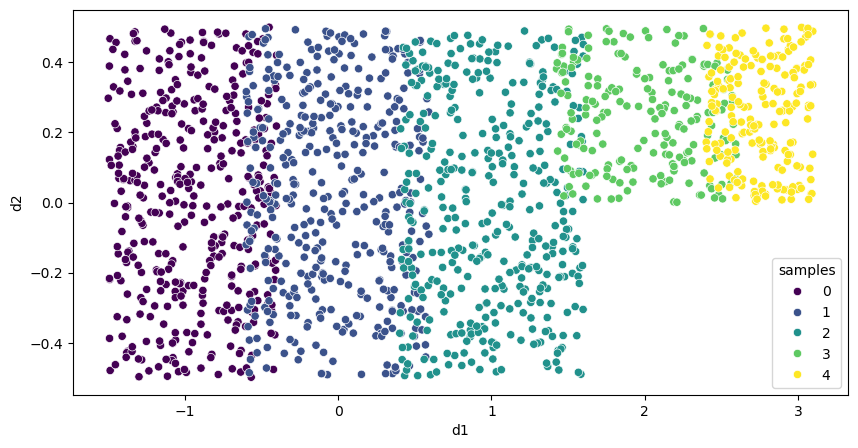

In [4]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis')

In [5]:
means = df[['d1', 'd2']].mean(axis=0)
stds = df[['d1', 'd2']].std(axis=0)
df[['d1', 'd2']] = (df[['d1', 'd2']] - means) / stds

In [6]:
df['samples'].value_counts()

samples
0    400
1    400
2    400
3    200
4    200
Name: count, dtype: int64

In [8]:
reg_m = [1_000, 100_000.0]
samples = sorted(df['samples'].unique())
growth_rates = []

df['growth_rate'] = np.nan
for i in range(len(samples)-1):
    x0 = df.loc[df['samples'] == samples[i], ['d1', 'd2']].values
    x1 = df.loc[df['samples'] == samples[i+1], ['d1', 'd2']].values
    m, n = ot.unif(len(x0)), ot.unif(len(x1))
    M = ot.dist(x0, x1)
    plan = ot.unbalanced.mm_unbalanced(m, n, M, reg_m, div='l2')
    gr = plan.sum(axis=1) * plan.shape[0]
    growth_rates.append(gr)
    df.loc[df['samples'] == samples[i], 'growth_rate'] = gr


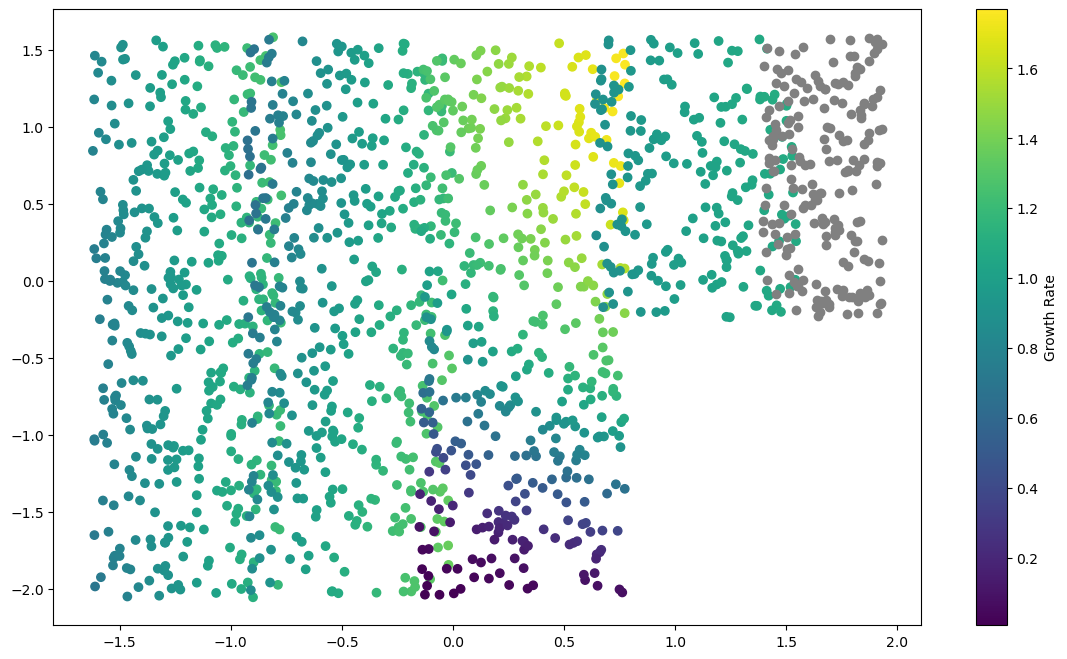

In [12]:
fig = plt.figure(figsize=(14, 8))
nan_mask = df['growth_rate'].isna()
# Plot non-NaN values with viridis colormap
scatter = plt.scatter(df.loc[~nan_mask, 'd1'], df.loc[~nan_mask, 'd2'], 
                     c=df.loc[~nan_mask, 'growth_rate'], cmap='viridis')
# Plot NaN values in gray
plt.scatter(df.loc[nan_mask, 'd1'], df.loc[nan_mask, 'd2'], c='gray')
plt.colorbar(scatter, label='Growth Rate');

In [15]:
df.to_csv(os.path.join(PROCESSED_DATA_DIR,'growth_rate','dying_example_growth_rate.csv'), index=False)